In [1]:
!pip install ktrain

     |████████████████████████████████| 25.3MB 142kB/s 
     |████████████████████████████████| 6.8MB 44.6MB/s 
     |████████████████████████████████| 983kB 41.6MB/s 
     |████████████████████████████████| 266kB 48.6MB/s 
     |████████████████████████████████| 1.9MB 39.9MB/s 
     |████████████████████████████████| 1.2MB 44.1MB/s 
     |████████████████████████████████| 471kB 46.6MB/s 
     |████████████████████████████████| 901kB 16.6MB/s 
     |████████████████████████████████| 3.3MB 48.1MB/s 
  Created wheel for ktrain: filename=ktrain-0.26.2-cp37-none-any.whl size=25277794 sha256=61ed5689c1e998b6cb85ebd549039be3839bac6dfafc4d021d714e3a814d4800
  Stored in directory: /root/.cache/pip/wheels/67/2e/f1/c72afa08df8b2d984b910dea228902ce81dae4511afe9fafd2
  Created wheel for langdetect: filename=langdetect-1.0.9-cp37-none-any.whl size=993223 sha256=312b4f4982781c165385c26195d5a3cd6615840ff965ad5c91dc1c5e15ec7db1
  Stored in directory: /root/.cache/pip/wheels/7e/18/13/038c34057808931c7d

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import ktrain
from ktrain import text

In [3]:
url_train_pos = '/content/train_Arabic_tweets_negative_20190413.tsv'
train_pos = pd.read_csv(url_train_pos, encoding='utf-8', sep='\t', header=None)

url_train_neg = '/content/train_Arabic_tweets_positive_20190413.tsv'
train_neg = pd.read_csv(url_train_neg, encoding='utf-8', sep='\t', header=None)


data_train = pd.concat([train_pos, train_neg])
data_train.columns = ['sentiment', 'tweet']
data_train.sample(5)
data_train.shape

(45275, 2)

In [4]:
data_train = data_train.sample(frac=1)

In [5]:
data_train = data_train.iloc[:25000,:]

In [6]:
data_train.shape

(25000, 2)

In [7]:
url_test_pos = '/content/test_Arabic_tweets_negative_20190413.tsv'
test_pos = pd.read_csv(url_test_pos, encoding='utf-8', sep='\t', header=None)

url_test_neg = '/content/test_Arabic_tweets_positive_20190413.tsv'
test_neg = pd.read_csv(url_test_neg, encoding='utf-8', sep='\t', header=None)


data_test = pd.concat([test_pos, test_neg])
data_test.columns = ['sentiment', 'tweet']
data_test.sample(5)
data_test.shape

(11520, 2)

In [ ]:
data_test = data_test.sample(frac=1)

In [8]:
data_test= data_test.iloc[:6450,:]

In [9]:
data_test.shape

(6450, 2)

In [10]:
import re
import nltk

nltk.download('stopwords')
nltk.download('punkt')

from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.isri import ISRIStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [11]:
# //////////////////Normalization///////////////
arabic_diacritics = re.compile("""
                             ّ    | 
                             َ    | 
                             ً    | 
                             ُ    | 
                             ٌ    | 
                             ِ    | 
                             ٍ    | 
                             ْ    | 
                             ـ     
                         """, re.VERBOSE)

def remove_emoji(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

def preprocess(new_text):
        new_text = re.sub('<.*?>', ' ', new_text)   # remove HTML tags
        new_text = re.sub(r'[^\w\s]', ' ', new_text) # remove punc.
        new_text = re.sub(r'\d+',' ',new_text)# remove numbers
        new_text = re.sub("[إأآا]", "ا", new_text)
        new_text = re.sub(arabic_diacritics, '', new_text)
        new_text = re.sub(r'(@.*?)[\s]', ' ', new_text) # Remove '@name'
        new_text = re.sub(r'[a-zA-Z]', ' ', new_text)
        new_text = re.sub('_',' ',new_text) 
        new_text = remove_emoji(new_text)
        new_text = re.sub(r'\s+', ' ', new_text).strip() # Remove trailing whitespace
        return new_text


data_train['tweet']= data_train['tweet'].apply(lambda x: preprocess(x))
data_test['tweet']= data_test['tweet'].apply(lambda x: preprocess(x))

In [12]:
data_train = data_train.sample(frac=1)
data_test = data_test.sample(frac=1)

In [13]:
data_train.head(5)

,sentiment,tweet
2231,neg,ٱكتفاء الرجل بانثى واحدة دليل على ٱن ظروفه الم...
12415,neg,ارجووكم اتوجهو للقياده في تمثيليه بتاعت ضرب رص...
9518,neg,ارجووكم اتوجهو للقياده في تمثيليه بتاعت ضرب رص...
19096,neg,ﻻ ﻗﻠﺖ ﻓﺂﻗﺪﻙ ﻵ ﺗﻘﻮﻝ ﻭﺃﻧﺎ ﺑﻌﺪ ﻗﻮﻝ يا ﻋﻴﻦ ﺃم ي ﺃﻋ...
5190,neg,انا ينادوني اسامة


In [14]:
data_test.head(5)

,sentiment,tweet
203,neg,انا كده استفدت ايه
1887,neg,تلاتين سنة بترقص الليلة رقصتنا انا ببكي دي حلا...
5149,neg,الله يشفيها يارب
656,neg,وش يقول الليل يقول مسكين اللي مو ضايفني
2105,neg,القلي بالهواء الساخن القلي العادي مهم قبل رمضا...


In [15]:
maxlen1 = data_train['tweet'].str.split().str.len().max()
maxlen2 = data_test['tweet'].str.split().str.len().max()

print(maxlen1)
print(maxlen2)

1271
154


## ARABERT

In [16]:
MODEL_NAME = 'aubmindlab/bert-base-arabertv02'
t = text.Transformer(MODEL_NAME, maxlen=512, classes=['pos','neg'])
trn = t.preprocess_train(data_train['tweet'].values, data_train['sentiment'].values)
val = t.preprocess_test(data_test['tweet'].values, data_test['sentiment'].values)

/usr/local/lib/python3.7/dist-packages/ktrain/text/preprocessor.py:414: UserWarning: The class_names argument is replacing the classes argument. Please update your code.
  warnings.warn('The class_names argument is replacing the classes argument. Please update your code.')



preprocessing train...
language: ar
train sequence lengths:
	mean : 12
	95percentile : 22
	99percentile : 25


/usr/local/lib/python3.7/dist-packages/ktrain/utils.py:589: UserWarning: class_names argument was ignored, as they were extracted from string labels in dataset
  if self.get_classes(): warnings.warn('class_names argument was ignored, as they were extracted from string labels in dataset')


Is Multi-Label? False
preprocessing test...
language: ar
test sequence lengths:
	mean : 11
	95percentile : 22
	99percentile : 25


In [17]:
AraBERT_model = t.get_classifier()

In [18]:
AraBERT_learner = ktrain.get_learner(AraBERT_model, train_data=trn, val_data=val, batch_size=6)
AraBERT_learner.fit_onecycle(lr = 2e-5, epochs=2)



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/2
4167/4167 [==============================] - 3113s 743ms/step - loss: 0.6144 - accuracy: 0.6576 - val_loss: 0.4113 - val_accuracy: 0.8360
Epoch 2/2
4167/4167 [==============================] - 3096s 742ms/step - loss: 0.4555 - accuracy: 0.7831 - val_loss: 0.4375 - val_accuracy: 0.8312


In [19]:
AraBERT_learner.validate(class_names=t.get_classes())

              precision    recall  f1-score   support

         neg       0.97      0.84      0.90      5768
         pos       0.36      0.74      0.48       682

    accuracy                           0.83      6450
   macro avg       0.66      0.79      0.69      6450
weighted avg       0.90      0.83      0.86      6450



array([[4855,  913],
       [ 176,  506]])

In [20]:
predictor = ktrain.get_predictor(AraBERT_learner.model, t)

In [21]:
predictor.save('/content/AraBERT_learner')

In [22]:
tweets = pd.read_csv('tweet.csv')
tweets

,Tweets,created_at
0,حتى لو كل الشعب اخذ اللقاح يا ريت ثقافة البوس ...,2021-04-30 23:58:01
1,هل في خدمة تلقيح لكبار السن في المنزل اذا فيه ...,2021-04-30 22:07:53
2,يادي البلاوي الي ورا بعضيها شو نعمل طيب ناخد ا...,2021-04-30 20:21:43
3,اللي اخد اللقاح هاي الفترة شو نوع اللي اخدتوه,2021-04-30 20:11:42
4,خبراء اللقاح هو الحل الامثل لعودة التعليم الوج...,2021-04-30 19:04:06
...,...,...
2865,ينهون هاليومين يروح,2021-04-06 03:01:20
2866,ماحدا بيسال,2021-04-06 03:01:14
2867,برشلونة يهزم بلد الوليد ويقلص الفارق مع اتلتيك...,2021-04-06 03:01:04
2868,لمن اقسم و ما زال يحفظ القسم لمن راى الحسين نف...,2021-04-06 03:00:09


In [24]:
tweets['Tweets']= tweets['Tweets'].apply(lambda x: preprocess(str(x)))
tweets

,Tweets,created_at
0,حتى لو كل الشعب اخذ اللقاح يا ريت ثقافة البوس ...,2021-04-30 23:58:01
1,هل في خدمة تلقيح لكبار السن في المنزل اذا فيه ...,2021-04-30 22:07:53
2,يادي البلاوي الي ورا بعضيها شو نعمل طيب ناخد ا...,2021-04-30 20:21:43
3,اللي اخد اللقاح هاي الفترة شو نوع اللي اخدتوه,2021-04-30 20:11:42
4,خبراء اللقاح هو الحل الامثل لعودة التعليم الوج...,2021-04-30 19:04:06
...,...,...
2865,ينهون هاليومين يروح,2021-04-06 03:01:20
2866,ماحدا بيسال,2021-04-06 03:01:14
2867,برشلونة يهزم بلد الوليد ويقلص الفارق مع اتلتيك...,2021-04-06 03:01:04
2868,لمن اقسم و ما زال يحفظ القسم لمن راى الحسين نف...,2021-04-06 03:00:09


In [26]:
list_of_tweets = tweets['Tweets'].to_list()

pr = predictor.predict(list_of_tweets)
pr

['neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'pos',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'pos',
 'neg',
 'neg',
 'neg',
 'neg',
 'pos',
 'pos',
 'neg',
 'neg',
 'neg',
 'pos',
 'neg',
 'neg',
 'neg',
 'neg',
 'pos',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'neg',
 'neg',
 'neg',
 'pos',
 'neg',
 'neg',
 'pos',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'pos',
 'neg',
 'neg',
 'pos',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'pos',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'pos',
 'pos',
 'neg',
 'neg',
 'neg',
 'neg',
 'pos',
 'neg',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'neg',
 'pos',
 'neg',
 'pos',
 'pos',
 'neg',
 'neg',
 'neg',
 'neg',
 'pos',
 'pos',
 'neg',
 'pos',
 'neg',
 'neg',
 'pos',
 'neg',
 'pos',
 'neg',
 'pos',
 'pos',
 'neg',
 'neg',
 'pos',


In [27]:
prob_pr = predictor.predict_proba(list_of_tweets)
prob_pr

array([[0.97624195, 0.02375809],
       [0.9465843 , 0.05341578],
       [0.91819483, 0.08180514],
       ...,
       [0.1790422 , 0.82095784],
       [0.04369973, 0.9563003 ],
       [0.6730896 , 0.32691035]], dtype=float32)

In [28]:
predicted_tweets = pd.DataFrame(prob_pr)
predicted_tweets.columns=['neg_proba','pos_proba']
predicted_tweets['Tweet'] = list_of_tweets
predicted_tweets['sentiment'] = pr
predicted_tweets

,neg_proba,pos_proba,Tweet,sentiment
0,0.976242,0.023758,حتى لو كل الشعب اخذ اللقاح يا ريت ثقافة البوس ...,neg
1,0.946584,0.053416,هل في خدمة تلقيح لكبار السن في المنزل اذا فيه ...,neg
2,0.918195,0.081805,يادي البلاوي الي ورا بعضيها شو نعمل طيب ناخد ا...,neg
3,0.848099,0.151901,اللي اخد اللقاح هاي الفترة شو نوع اللي اخدتوه,neg
4,0.829154,0.170846,خبراء اللقاح هو الحل الامثل لعودة التعليم الوج...,neg
...,...,...,...,...
2865,0.831105,0.168895,ينهون هاليومين يروح,neg
2866,0.759375,0.240625,ماحدا بيسال,neg
2867,0.179042,0.820958,برشلونة يهزم بلد الوليد ويقلص الفارق مع اتلتيك...,pos
2868,0.043700,0.956300,لمن اقسم و ما زال يحفظ القسم لمن راى الحسين نف...,pos


In [29]:
predicted_tweets.to_csv('predicted_tweets.csv' ,index=False, encoding='utf-8' )

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
import re
plt.style.use('seaborn-deep')
plt.rcParams["figure.figsize"] = (20,10)

In [33]:
df1 = pd.read_csv('predicted_tweets.csv')

In [34]:
neg_tweets = df1.sort_values("neg_proba",ascending = False ,na_position ='last')['Tweet'].values[:3]
for i in range(len( neg_tweets )):
    print(i,')' , ' ' ,neg_tweets[i] )

0 )   يعني اقسم بالله كان المفروض تكون قيلولة ساعة واصحى اروح اخد الجرعة التانية من المطعوم كيف صارت نومة اربع ساعات ونص
1 )   وزارة الصحة عظم الله اجر الاردنيين بهذه الوزارة التي لم يعد لديها مخصصات للبحوث الصحية والعلمية ولا حتى محاولة اختراع مطعوم واحد اعزلوا حالكوا لحالكوا وعالجوا حالكوا لحالكوا
2 )   حاربتوا الشعب بمصدر رزقه مقابل المطعوم ممكن نتقب لها بس انه ما يكون في خطة معتمدة لانجاح عملية اعطاء اللقاحات لملايين من العاملين في غضون شهر وبالاصل هل اللقاح متوفر لهالاعداد وضع القط ارة غير مقبول في اشخاص مسجلين دور للحصول على اللقاح من اشهر ولسا ما وصل دورهم


In [35]:
for i, row in df1.iterrows():
        if (df1.loc[i , 'pos_proba'] <= 0.30): df1.loc[i , 'sentiment'] = "very negative";
        elif (df1.loc[i , 'pos_proba'] < 0.45): df1.loc[i , 'sentiment'] = "negative"; 
        elif (df1.loc[i , 'pos_proba'] > 0.70): df1.loc[i , 'sentiment'] = "very positive"; 
        elif (df1.loc[i , 'pos_proba'] > 0.55): df1.loc[i , 'sentiment'] = "positive";
        elif ((df1.loc[i , 'pos_proba'] >= 0.45) & (df1.loc[i , 'pos_proba'] <=0.55)): df1.loc[i , 'sentiment'] = "neutral or mixed";


In [36]:
df1['created_at'] = tweets['created_at']
df1

,neg_proba,pos_proba,Tweet,sentiment,created_at
0,0.976242,0.023758,حتى لو كل الشعب اخذ اللقاح يا ريت ثقافة البوس ...,very negative,2021-04-30 23:58:01
1,0.946584,0.053416,هل في خدمة تلقيح لكبار السن في المنزل اذا فيه ...,very negative,2021-04-30 22:07:53
2,0.918195,0.081805,يادي البلاوي الي ورا بعضيها شو نعمل طيب ناخد ا...,very negative,2021-04-30 20:21:43
3,0.848099,0.151901,اللي اخد اللقاح هاي الفترة شو نوع اللي اخدتوه,very negative,2021-04-30 20:11:42
4,0.829155,0.170846,خبراء اللقاح هو الحل الامثل لعودة التعليم الوج...,very negative,2021-04-30 19:04:06
...,...,...,...,...,...
2865,0.831105,0.168895,ينهون هاليومين يروح,very negative,2021-04-06 03:01:20
2866,0.759375,0.240625,ماحدا بيسال,very negative,2021-04-06 03:01:14
2867,0.179042,0.820958,برشلونة يهزم بلد الوليد ويقلص الفارق مع اتلتيك...,very positive,2021-04-06 03:01:04
2868,0.043700,0.956300,لمن اقسم و ما زال يحفظ القسم لمن راى الحسين نف...,very positive,2021-04-06 03:00:09


In [37]:
df1.to_csv('predicted_tweets_AraBert2.csv' ,index=False, encoding='utf-8' )

In [38]:
sent = df1.groupby('sentiment').count()
sent

,neg_proba,pos_proba,Tweet,created_at
sentiment,,,,
negative,457,457,457,457
neutral or mixed,183,183,182,182
positive,255,255,255,255
very negative,1441,1441,1441,1441
very positive,534,534,534,534


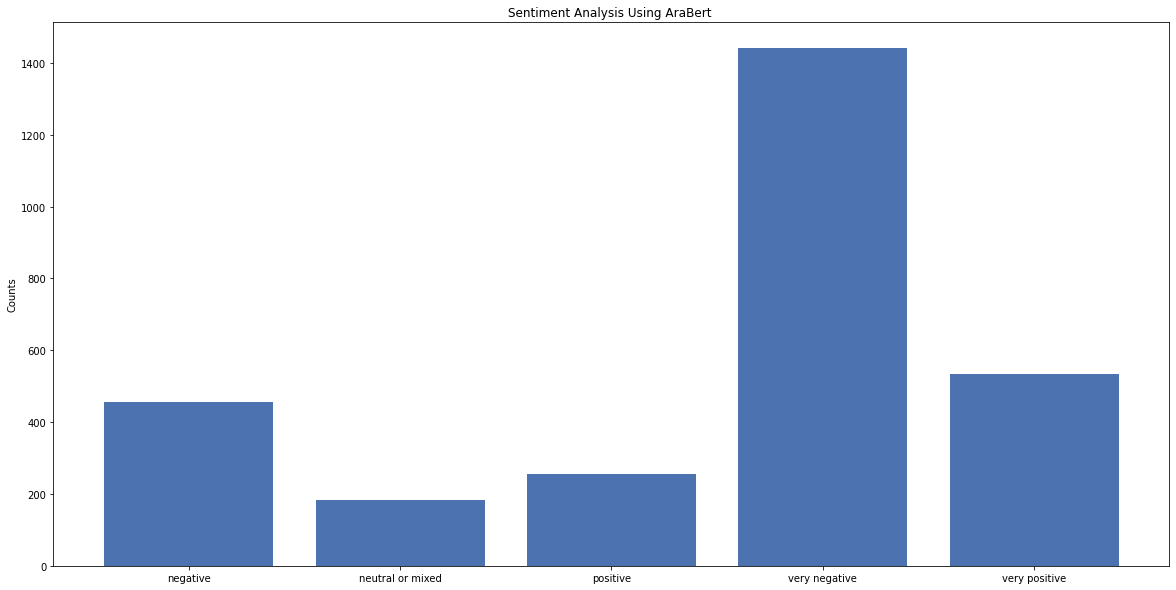

In [39]:
plt.bar(sent.index , sent.Tweet)
plt.ylabel('Counts')
plt.title('Sentiment Analysis Using AraBert ')
plt.savefig('AraBert.png')
plt.show()

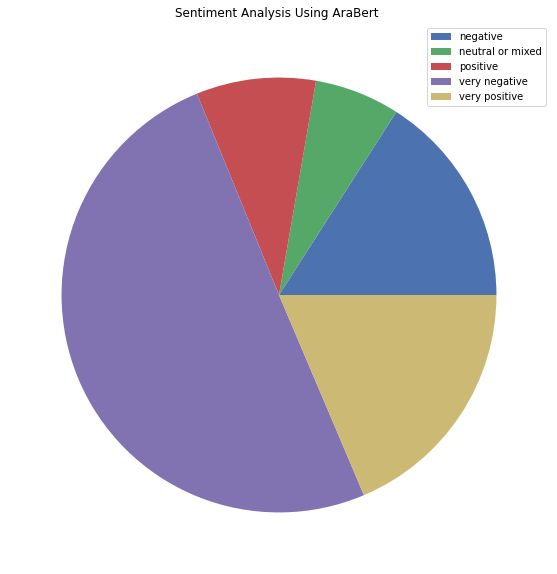

In [40]:
plt.pie( sent.Tweet)
plt.legend( sent.index , loc = 'upper right')
plt.title('Sentiment Analysis Using AraBert ')
plt.savefig('Figures\AraBert_pie_chart.png')

plt.show()